## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Project Approach

The purpose of this project is to leverage linear regression to help not only home sellers to identify features that will boost home prices but also to guide home buyers to determine whether a house is over or under valued based on its features.

The model will be built following the OSEMIN framework. The framework provides guidelines to working on data problems using these four steps Obtain, Scrub, Explore, and Model.

### Obtain data

#### Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("kc_house_data.csv")

In [2]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Initial inspection of dataframe, datatypes, and null values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.5+ MB


In [4]:
res = data.isna().sum()
print(res[res>0],'\nTotal:',len(data))

waterfront      2376
view              63
yr_renovated    3842
dtype: int64 
Total: 21597


In [5]:
def check(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
    print(f'\nUnique non-na values:') 
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

In [6]:
column_list = data.columns
for columns in column_list:
    print(columns+":")
    check(data[columns],10)
    print("------------------")

id:
Column: df['id']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
------------------
date:
Column: df['date']':
dtype: object
isna: 0 out of 21597 - 0.0%

Unique non-na values:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
4/28/2015    121
7/9/2014     121
4/14/2015    121
4/22/2015    121
Name: date, dtype: int64
------------------
price:
Column: df['price']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
450000    172
350000    172
550000    159
500000    152
425000    150
325000    148
400000    145
375000    138
300000    133
525000    131
Name: price, dtype: int64
------------------
bedrooms:
Column: df['bedrooms']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
3     9824
4     6882
2     

In [7]:
print("remove '?' and nan:")
for columns in column_list:
    data[columns].replace(to_replace = '?',value=np.nan,inplace=True)
print("end")

remove '?' and nan:
end


In [8]:
for columns in column_list:
    print(columns+":")
    check(data[columns],10)
    print("------------------")

id:
Column: df['id']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
Name: id, dtype: int64
------------------
date:
Column: df['date']':
dtype: object
isna: 0 out of 21597 - 0.0%

Unique non-na values:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
3/25/2015    123
4/28/2015    121
7/9/2014     121
4/14/2015    121
4/22/2015    121
Name: date, dtype: int64
------------------
price:
Column: df['price']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
450000    172
350000    172
550000    159
500000    152
425000    150
325000    148
400000    145
375000    138
300000    133
525000    131
Name: price, dtype: int64
------------------
bedrooms:
Column: df['bedrooms']':
dtype: int64
isna: 0 out of 21597 - 0.0%

Unique non-na values:
3     9824
4     6882
2     

### Scrub and Clean Data

#### Inspect Columns in the Dataframe

### Examine Features vs Price

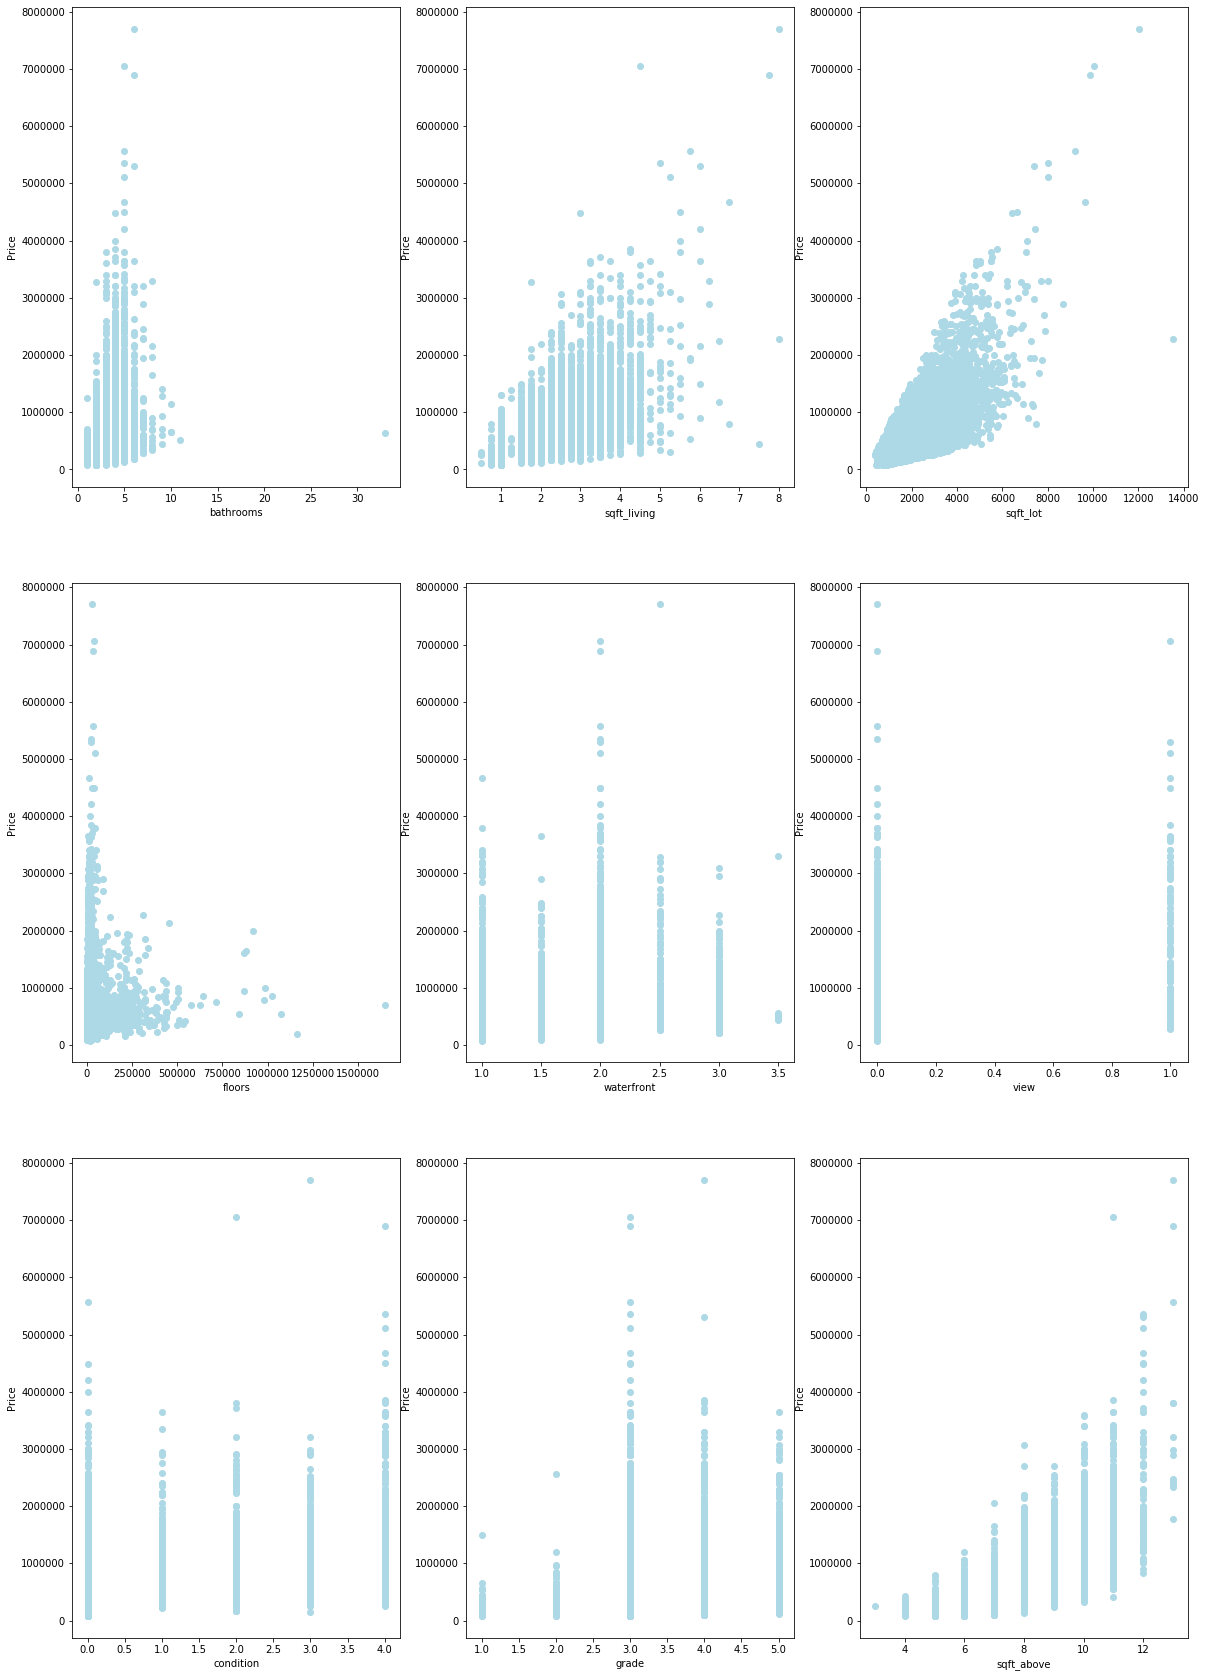

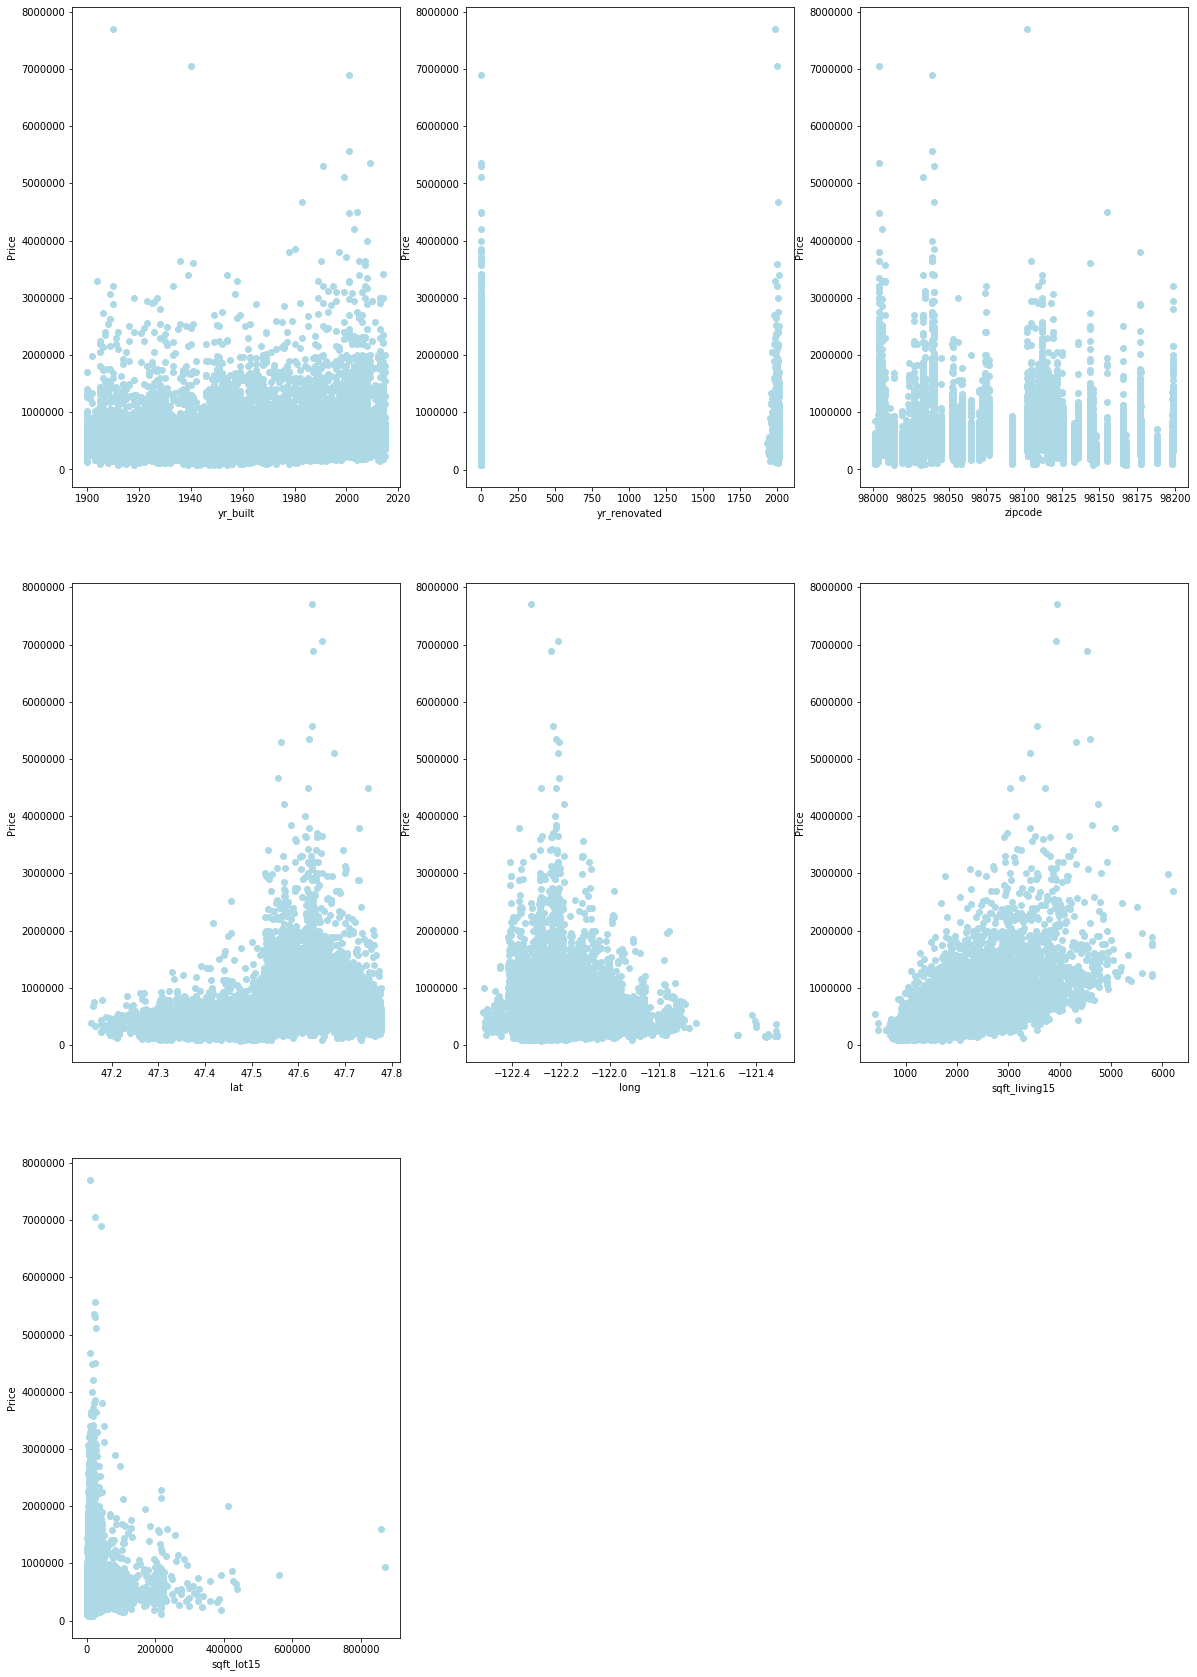

In [9]:
x_label_list = column_list[4:]
plt.figure(figsize=(20,30))
for i in range(9):
    plt.subplot(331+i)
    plt.scatter(data.iloc[:,i+3:i+4], data.iloc[:,2:3], c='lightblue')
    plt.xlabel(x_label_list[i])
    plt.ylabel('Price')
# plt.show()
plt.figure(figsize=(20,30))
for i in range(7):
    plt.subplot(331+i)
    plt.scatter(data.iloc[:,i+14:i+15], data.iloc[:,2:3], c='lightblue')
    plt.xlabel(x_label_list[i+14-4])
    plt.ylabel('Price')
plt.show()

### Explore Data

#### Person’s Sample questions

##### Question 1: What factors have a greater impact on prices?

From the scatter diagram of price and price influencing factors, it can be seen that housing area, number of floors, housing grade and other factors have a certain impact on the price of housing. The housing area almost plays a decisive role in the housing price, followed by the number of floors. In the case of the same housing area, the more floors, the higher the house price, and finally The level of housing also has an impact on housing prices, but not as much as the housing area and the number of floors.

##### Question 2: Which factors have great influence on price forecast?

In [10]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [11]:
def color_true_red(val):
    color = 'red' if val > 0 else 'black'
    return 'color: %s' % color
(data.iloc[:,2:].corr() > .75).style.applymap(color_true_red)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


The above table shows the correlation coefficient between each column and other columns in the data. We can draw the following conclusions. First of all, As can be seen from the previous question, the column sqft_living almost plays a decisive role in housing prices, therefore, it will also have a huge impact on price forecasting; bedrooms, floors, condition, grade and lat also have an impact on housing prices, so it will have an impact on price forecasts. In addition, the noise such as invalid value and missing value in the data set will still affect the prediction results, and it is a negative impact.

##### Question 3: What is the most common number of bedrooms?

In [12]:
bedrooms = data["bedrooms"]
bedrooms_sort = bedrooms.drop_duplicates()

In [13]:
bedrooms_num = []
for i in range(len(bedrooms_sort)):
    bedrooms_num.append(0)

In [14]:
for i in range(len(bedrooms_sort)):
    for j in range(len(bedrooms)):
        if np.array(bedrooms_sort)[i] == np.array(bedrooms)[j]:
            bedrooms_num[i] = bedrooms_num[i] + 1

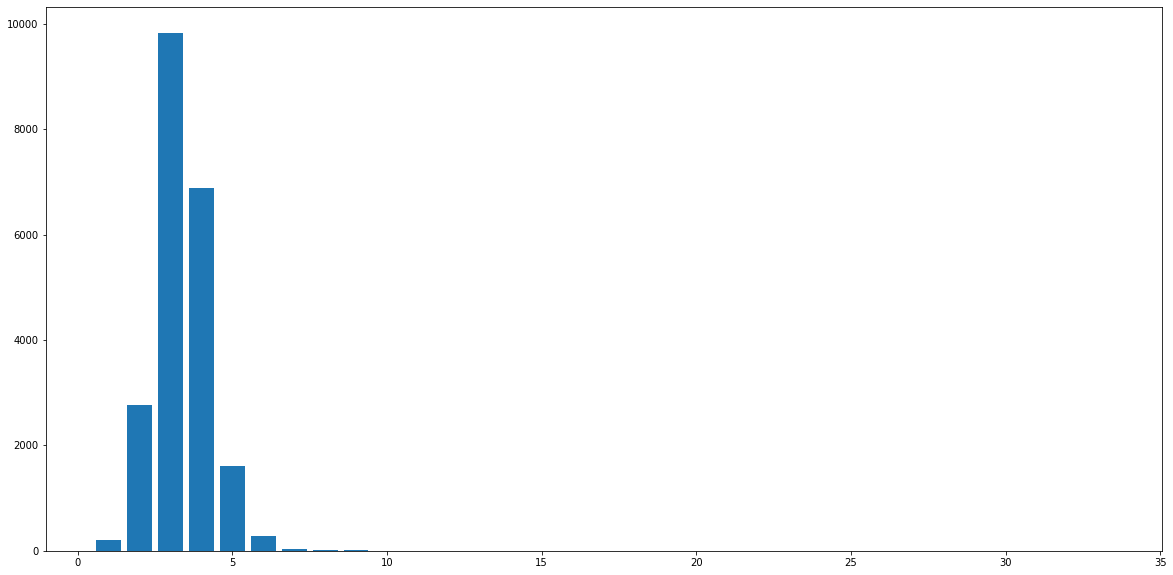

In [15]:
plt.figure(figsize=(20,10))
plt.bar(bedrooms_sort, bedrooms_num)
plt.show()

As can be seen from the above figure, the most common number of bedrooms is 3, which indicates that most people like to buy a house with three bedrooms.

##### Question 4: Analyze the feasibility of linear regression model for price forecasting.

Linear regression is a prediction method that takes the influencing factors as independent variables, the predictive values look at the contributing variables, and calculates the coefficients of the multivariate linear equation repeatedly. To a certain extent, housing price is the most dependent variable, and its influencing factors as independent variables are theoretically feasible, so the prediction accuracy is still satisfactory. However, if we further study, we can find that there may be a nonlinear relationship between housing price and its influencing factors. Therefore, if we want to further improve the prediction accuracy, we can adopt other nonlinear prediction methods, such as neural network Network, etc.

In [16]:
import statsmodels.stats.api as sms

#### One-Hot Category Encoding

In [17]:
price = data["price"]#bushi
bedrooms = data["bedrooms"]
bathrooms = data["bathrooms"]
sqft_living = data["sqft_living"]#bushi
sqft_lot = data["sqft_lot"]#bushi
floors = data["floors"]
condition = data["condition"]
grade = data["grade"]
sqft_above = data["sqft_above"] #bushi
sqft_basement = data["sqft_basement"]#bushi
zipcode = data["zipcode"]
lat = data["lat"]#bushi
long = data["long"]#bushi

In [18]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
bedrooms_hot = OneHotEncoder(sparse=False).fit_transform(np.array(bedrooms).reshape(-1,1))
bathrooms_hot = OneHotEncoder(sparse=False).fit_transform(np.array(bathrooms).reshape(-1,1))
floors_hot = OneHotEncoder(sparse=False).fit_transform(np.array(floors).reshape(-1,1))
condition_hot = OneHotEncoder(sparse=False).fit_transform(np.array(condition).reshape(-1,1))
grade_hot = OneHotEncoder(sparse=False).fit_transform(np.array(grade).reshape(-1,1))

C:\Users\Xin\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Xin\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categori

In [19]:
price_hot = np.array(price).reshape(-1,1)
sqft_living_hot = np.array(sqft_living).reshape(-1,1)
sqft_lot = np.array(sqft_lot).reshape(-1,1)
lat_hot = np.array(sqft_lot).reshape(-1,1)
sqft_above = np.array(sqft_above).reshape(-1,1)
data_final = np.concatenate((price_hot,bedrooms_hot,bathrooms_hot,floors_hot,condition_hot,
                            grade_hot,sqft_living_hot,sqft_lot,
                            lat_hot,sqft_above),axis=1)

In [20]:
print("bedrooms_hot.shape: ", bedrooms_hot.shape)
print("bathrooms_hot.shape: ", bathrooms_hot.shape)
print("floors_hot,shape: ", floors_hot.shape)
print("condition_hot.shape: ", condition_hot.shape)
print("grade_hot.shape: ", grade_hot.shape)

bedrooms_hot.shape:  (21597, 12)
bathrooms_hot.shape:  (21597, 9)
floors_hot,shape:  (21597, 3)
condition_hot.shape:  (21597, 5)
grade_hot.shape:  (21597, 11)


In [21]:
list_ = []
list_.append('price')
for i in range(bedrooms_hot.shape[1]):
    list_.append("bedrooms_" + str(i+1))

for i in range(bathrooms_hot.shape[1]):
    list_.append("bathrooms_" + str(i+1))

for i in range(floors_hot.shape[1]):
    list_.append("floors_" + str(i+1))
    
for i in range(condition_hot.shape[1]):
    list_.append("condition_" + str(i+1))
    
for i in range(grade_hot.shape[1]):
    list_.append("grade_" + str(i+1))
    
other = ["sqft_living","sqft","lat","sqft_above"]
for i in range(len(other)):
    list_.append(other[i])

data_final = pd.DataFrame(data_final, columns=list_)

#### Remove null values

In [22]:
data_fina = data_final.dropna(axis=0, how='any') 
for i in range(36):
    data_fina = data_fina[data_fina.iloc[:,i:i+1].isin(['?'])]

In [23]:
data_final.head()

,price,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,sqft_living,sqft,lat,sqft_above
0,221900.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1180.0,5650.0,5650.0,1180.0
1,538000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2570.0,7242.0,7242.0,2170.0
2,180000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,770.0,10000.0,10000.0,770.0
3,604000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,5000.0,5000.0,1050.0
4,510000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1680.0,8080.0,8080.0,1680.0


#### Perform Train-Test-Split

In [24]:
from sklearn.model_selection import train_test_split
# Create train-test dataset for model validation later
train, test = train_test_split(data_final, test_size=0.2, random_state=36)

# Check datasets
print(train.shape, test.shape)

(17277, 45) (4320, 45)


### Model Data

In [25]:
fea_excl = ['price','sqft_living', 'sqft_above','lat']          

In [26]:
# Clean up columns names
train.columns = [col.replace('.', '_') for col in train.columns]
train.columns = [col.replace(' ', '_') for col in train.columns]

# Define the problem
outcome = 'price'

# Create the feature list
x_cols = list(train.columns)

# Remove unwated features
for col in fea_excl:
    x_cols.remove(col)


In [27]:
from statsmodels.formula.api import ols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     677.5
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:07   Log-Likelihood:            -2.3824e+05
No. Observations:               17277   AIC:                         4.765e+05
Df Residuals:                   17241   BIC:                         4.768e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.227e+05   2.53e+04     32.468      0.000    7.73e+05    8.72e+05
bedrooms_1   1408.7556   3.59e+04      0.039      0.969   -6.89e+04    7.17e+04
bedrooms_2   1.696e+04   3.14e+04      0.540      0.589   -4.46e+04    7.85e+04
bedrooms_3  -8983.1068   3.11e+04     -0.289      0.773   -6.99e+04    5.19e+04
bedrooms_4   2.242e+04   3.11e+04      0.721      0.471   -3.85e+04    8.34e+04
bedrooms_5   7.327e+04   3.15e+04      2.329      0.020    1.16e+04    1.35e+05
bedrooms_6   5.739e+04    3.4e+04      1.687      0.092   -9296.586    1.24e+05
bedrooms_7  -3278.1697   5.29e+04     -0.062      0.951   -1.07e+05       1e+05
bedrooms_8   2.111e+05   7.25e+04      2.912      0.004     6.9e+04    3.53e+05
bedrooms_9   1.837e+05   1.02e+05      1.804      0.071   -1.59e+04    3.83e+05
bedrooms_10  7.236e+04   1.29e+05      0.560      0.575   -1.81e+05    3.26e+05
bedrooms_11  6.171e+04   2.19e+05      0.282      0.778   -3.67e+05     4.9e+05
bedrooms_12  1.346e+05   2.19e+05      0.615      0.538   -2.94e+05    5.63e+05
bathrooms_1   -4.6e+05   3.81e+04    -12.066      0.000   -5.35e+05   -3.85e+05
bathrooms_2 -4.459e+05   2.56e+04    -17.394      0.000   -4.96e+05   -3.96e+05
bathrooms_3 -4.318e+05   2.54e+04    -17.010      0.000   -4.82e+05   -3.82e+05
bathrooms_4 -3.016e+05   2.53e+04    -11.900      0.000   -3.51e+05   -2.52e+05
bathrooms_5 -9.867e+04   2.73e+04     -3.611      0.000   -1.52e+05   -4.51e+04
bathrooms_6  1.599e+05   3.85e+04      4.157      0.000    8.45e+04    2.35e+05
bathrooms_7  3.324e+05   7.47e+04      4.450      0.000    1.86e+05    4.79e+05
bathrooms_8 -2.491e-10   1.38e-10     -1.802      0.072    -5.2e-10    2.19e-11
bathrooms_9  2.068e+06   1.54e+05     13.396      0.000    1.77e+06    2.37e+06
floors_1     3.044e+05   9413.819     32.338      0.000    2.86e+05    3.23e+05
floors_2     2.581e+05   9272.385     27.833      0.000     2.4e+05    2.76e+05
floors_3     2.602e+05   1.17e+04     22.261      0.000    2.37e+05    2.83e+05
condition_1   1.65e+05   3.95e+04      4.178      0.000    8.76e+04    2.42e+05
condition_2   1.01e+05   1.91e+04      5.281      0.000    6.35e+04    1.38e+05
condition_3  1.159e+05   1.08e+04     10.710      0.000    9.47e+04    1.37e+05
condition_4  1.796e+05    1.1e+04     16.345      0.000    1.58e+05    2.01e+05
condition_5  2.611e+05   1.17e+04     22.247      0.000    2.38e+05    2.84e+05
grade_1     -6.661e+05   2.18e+05     -3.055      0.002   -1.09e+06   -2.39e+05
grade_2     -6.293e+05   5.69e+04    -11.058      0.000   -7.41e+05   -5.18e+05
grade_3     -6.016e+05   2.79e+04    -21.566      0.000   -6.56e+05   -5.47e+05
grade_4     -5.418e+05    2.4e+04    -22.550      0.000   -5.89e+05   -4.95e+05
grade_5     -4.362e+05   2.36e+04    -18.503      0.000   -4.82e+05    -3.9e+05
grade_6     -2.885e+05   2.36e+04    -12.20

#### Remove P-Value > 0.05

In [28]:
def refine_xcols(summary):
    p_table = summary.tables[1]
    p_table = pd.DataFrame(p_table.data)
    p_table.columns = p_table.iloc[0,:]
    p_table = p_table.drop(0)
    p_table = p_table.set_index(p_table.columns[0])
    bef_cols = len(p_table['P>|t|'])
    p_table['P>|t|'] = p_table['P>|t|'].astype(float)
    x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
    if 'Intercept' in x_cols:
        x_cols.remove('Intercept')
    aft_cols = len(x_cols)
    return bef_cols, aft_cols, x_cols

In [29]:
# Refit model with subset features by removing features with p-values that are greater than 0.05
bef_cols, aft_cols, x_cols = refine_xcols(model.summary())
print(f'No. of col before: {bef_cols}. after: {aft_cols}')
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

No. of col before: 42. after: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     905.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:07   Log-Likelihood:            -2.3827e+05
No. Observations:               17277   AIC:                         4.766e+05
Df Residuals:                   17250   BIC:                         4.768e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     8.31e+05   1.96e+04     42.490      0.000    7.93e+05    8.69e+05
bedrooms_5   6.269e+04   7157.401      8.758      0.000    4.87e+04    7.67e+04
bedrooms_8   1.982e+05   7.19e+04      2.756      0.006    5.72e+04    3.39e+05
bathrooms_1 -4.699e+05   3.74e+04    -12.565      0.000   -5.43e+05   -3.97e+05
bathrooms_2 -4.552e+05   2.49e+04    -18.284      0.000   -5.04e+05   -4.06e+05
bathrooms_3 -4.378e+05   2.47e+04    -17.722      0.000   -4.86e+05   -3.89e+05
bathrooms_4 -3.024e+05   2.48e+04    -12.182      0.000   -3.51e+05   -2.54e+05
bathrooms_5 -9.254e+04   2.71e+04     -3.414      0.001   -1.46e+05   -3.94e+04
bathrooms_6  1.688e+05   3.84e+04      4.399      0.000    9.36e+04    2.44e+05
bathrooms_7  3.338e+05   7.48e+04      4.463      0.000    1.87e+05     4.8e+05
bathrooms_9  2.086e+06   1.53e+05     13.644      0.000    1.79e+06    2.39e+06
floors_1     3.095e+05   7709.143     40.153      0.000    2.94e+05    3.25e+05
floors_2      2.64e+05   7570.012     34.873      0.000    2.49e+05    2.79e+05
floors_3     2.574e+05   1.03e+04     24.941      0.000    2.37e+05    2.78e+05
condition_1  1.675e+05   3.95e+04      4.246      0.000    9.02e+04    2.45e+05
condition_2  1.038e+05   1.89e+04      5.500      0.000    6.68e+04    1.41e+05
condition_3  1.161e+05   1.03e+04     11.285      0.000    9.59e+04    1.36e+05
condition_4  1.805e+05   1.05e+04     17.244      0.000     1.6e+05    2.01e+05
condition_5  2.631e+05   1.13e+04     23.329      0.000    2.41e+05    2.85e+05
grade_1     -6.701e+05   2.18e+05     -3.072      0.002    -1.1e+06   -2.43e+05
grade_2     -6.258e+05   5.66e+04    -11.055      0.000   -7.37e+05   -5.15e+05
grade_3      -5.98e+05   2.78e+04    -21.491      0.000   -6.53e+05   -5.44e+05
grade_4     -5.406e+05   2.39e+04    -22.629      0.000   -5.87e+05   -4.94e+05
grade_5     -4.383e+05   2.34e+04    -18.728      0.000   -4.84e+05   -3.92e+05
grade_6     -2.889e+05   2.35e+04    -12.313      0.000   -3.35e+05   -2.43e+05
grade_7     -6.944e+04   2.38e+04     -2.924      0.003   -1.16e+05   -2.29e+04
grade_8      1.793e+05   2.43e+04      7.369      0.000    1.32e+05    2.27e+05
grade_9      5.141e+05   2.62e+04     19.623      0.000    4.63e+05    5.65e+05
grade_10     1.052e+06   3.58e+04     29.414      0.000    9.82e+05    1.12e+06
grade_11     2.316e+06   7.92e+04     29.264      0.000    2.16e+06    2.47e+06
sqft           -0.1226      0.042     -2.905      0.004      -0.205      -0.040
==============================================================================
Omnibus:                     9428.433   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184394.645
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      18.386   Cond. N

#### Remove P-Value > 0.05 again

In [30]:
# Refit model with subset features by removing features with p-values that are greater than 0.05
bef_cols, aft_cols, x_cols = refine_xcols(model.summary())
print(f'No. of col before: {bef_cols}. after: {aft_cols}')
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

No. of col before: 31. after: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     905.9
Date:                Tue, 22 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:23:07   Log-Likelihood:            -2.3827e+05
No. Observations:               17277   AIC:                         4.766e+05
Df Residuals:                   17250   BIC:                         4.768e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     8.31e+05   1.96e+04     42.490      0.000    7.93e+05    8.69e+05
bedrooms_5   6.269e+04   7157.401      8.758      0.000    4.87e+04    7.67e+04
bedrooms_8   1.982e+05   7.19e+04      2.756      0.006    5.72e+04    3.39e+05
bathrooms_1 -4.699e+05   3.74e+04    -12.565      0.000   -5.43e+05   -3.97e+05
bathrooms_2 -4.552e+05   2.49e+04    -18.284      0.000   -5.04e+05   -4.06e+05
bathrooms_3 -4.378e+05   2.47e+04    -17.722      0.000   -4.86e+05   -3.89e+05
bathrooms_4 -3.024e+05   2.48e+04    -12.182      0.000   -3.51e+05   -2.54e+05
bathrooms_5 -9.254e+04   2.71e+04     -3.414      0.001   -1.46e+05   -3.94e+04
bathrooms_6  1.688e+05   3.84e+04      4.399      0.000    9.36e+04    2.44e+05
bathrooms_7  3.338e+05   7.48e+04      4.463      0.000    1.87e+05     4.8e+05
bathrooms_9  2.086e+06   1.53e+05     13.644      0.000    1.79e+06    2.39e+06
floors_1     3.095e+05   7709.143     40.153      0.000    2.94e+05    3.25e+05
floors_2      2.64e+05   7570.012     34.873      0.000    2.49e+05    2.79e+05
floors_3     2.574e+05   1.03e+04     24.941      0.000    2.37e+05    2.78e+05
condition_1  1.675e+05   3.95e+04      4.246      0.000    9.02e+04    2.45e+05
condition_2  1.038e+05   1.89e+04      5.500      0.000    6.68e+04    1.41e+05
condition_3  1.161e+05   1.03e+04     11.285      0.000    9.59e+04    1.36e+05
condition_4  1.805e+05   1.05e+04     17.244      0.000     1.6e+05    2.01e+05
condition_5  2.631e+05   1.13e+04     23.329      0.000    2.41e+05    2.85e+05
grade_1     -6.701e+05   2.18e+05     -3.072      0.002    -1.1e+06   -2.43e+05
grade_2     -6.258e+05   5.66e+04    -11.055      0.000   -7.37e+05   -5.15e+05
grade_3      -5.98e+05   2.78e+04    -21.491      0.000   -6.53e+05   -5.44e+05
grade_4     -5.406e+05   2.39e+04    -22.629      0.000   -5.87e+05   -4.94e+05
grade_5     -4.383e+05   2.34e+04    -18.728      0.000   -4.84e+05   -3.92e+05
grade_6     -2.889e+05   2.35e+04    -12.313      0.000   -3.35e+05   -2.43e+05
grade_7     -6.944e+04   2.38e+04     -2.924      0.003   -1.16e+05   -2.29e+04
grade_8      1.793e+05   2.43e+04      7.369      0.000    1.32e+05    2.27e+05
grade_9      5.141e+05   2.62e+04     19.623      0.000    4.63e+05    5.65e+05
grade_10     1.052e+06   3.58e+04     29.414      0.000    9.82e+05    1.12e+06
grade_11     2.316e+06   7.92e+04     29.264      0.000    2.16e+06    2.47e+06
sqft           -0.1226      0.042     -2.905      0.004      -0.205      -0.040
==============================================================================
Omnibus:                     9428.433   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184394.645
Skew:                           2.203   Prob(JB):                         0.00
Kurtosis:                      18.386   Cond. N

#### Multicollinearity Check

In [31]:
def cal_vif(dataframe, xcol, variance_inflation_factor):
    X = dataframe[xcol]
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return xcol, vif

In [32]:
# Investigate multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_cols, vif = cal_vif(train, x_cols, variance_inflation_factor)
list(zip(x_cols, vif))

C:\Users\Xin\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('bedrooms_5', 1.09112810784121),
 ('bedrooms_8', 1.0179389477693785),
 ('bathrooms_1', inf),
 ('bathrooms_2', inf),
 ('bathrooms_3', inf),
 ('bathrooms_4', inf),
 ('bathrooms_5', inf),
 ('bathrooms_6', inf),
 ('bathrooms_7', inf),
 ('bathrooms_9', inf),
 ('floors_1', inf),
 ('floors_2', inf),
 ('floors_3', inf),
 ('condition_1', inf),
 ('condition_2', inf),
 ('condition_3', inf),
 ('condition_4', inf),
 ('condition_5', inf),
 ('grade_1', inf),
 ('grade_2', inf),
 ('grade_3', inf),
 ('grade_4', inf),
 ('grade_5', inf),
 ('grade_6', inf),
 ('grade_7', inf),
 ('grade_8', inf),
 ('grade_9', inf),
 ('grade_10', inf),
 ('grade_11', inf),
 ('sqft', 1.0311723180946553)]

#### Normality Assumption Check

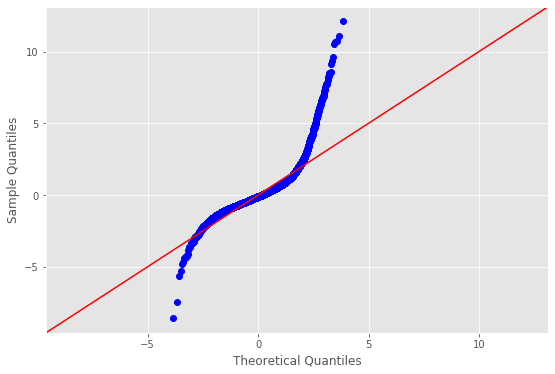

In [33]:
# Plot residual QQ Plot to check normality 
import statsmodels.api as sm
import scipy.stats as stats
with plt.style.context('ggplot'):
    plt.rc("figure", figsize=(9,6))
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()

#### Homoscedasticity Assumption Check

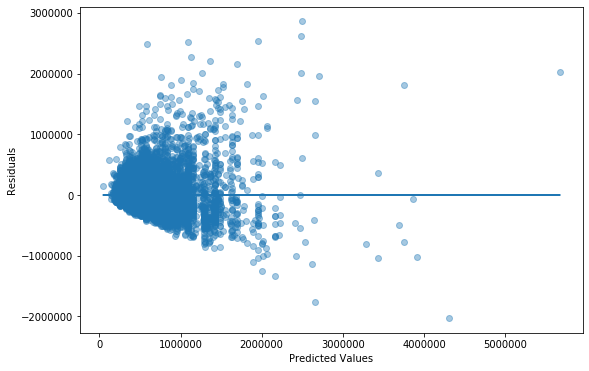

In [34]:
# Plot to show Homoscedasticity
plt.rc("figure", figsize=(9,6))
plt.scatter(model.predict(train[x_cols]), model.resid, alpha=0.4)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [35]:
def guiyi(data):
    max_data = np.max(data)
    return data / max_data
#归一化

In [36]:
from sklearn.linear_model import LinearRegression
X_train = train.iloc[:,1:]
y_train = train["price"]
y_train = guiyi(y_train)
X_test = test.iloc[:,1:]
y_test = test["price"]
y_test = guiyi(y_test)
reg = LinearRegression()
reg.fit(X_train, y_train)

#y = a1x1+ a2x2 + a3x3+ + ... +a36x36  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
y_pred = reg.predict(X_test)

#### Comparing  R^2  Between Train and Test Sets

In [38]:
from sklearn.metrics import r2_score
yy_pred = []
yy_test = []
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        yy_test.append(np.array(y_test)[i])
        yy_pred.append(y_pred[i])
yy_test = np.array(yy_test)

        
train_r2 = r2_score(y_train, reg.predict(X_train))
print(f'train r2 = {round(train_r2,3)}')

test_r2 = r2_score(yy_test, yy_pred)
print(f'test r2 = {round(test_r2,3)}')


train r2 = 0.618
test r2 = 0.589


There is a difference of 1.9330% between the train and test  R^2 .
The model does not appear to be over or under fitted.

#### Sqft_living Coefficient

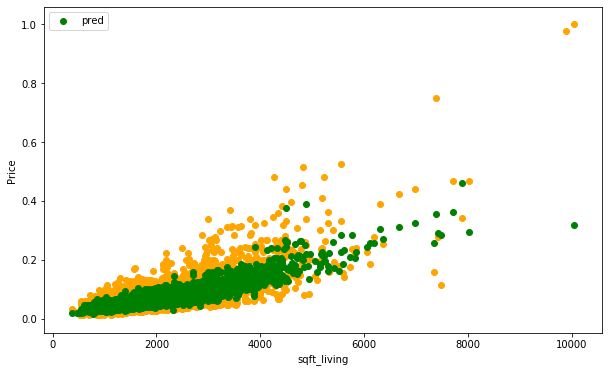

In [39]:
yy_pred = []
xx = test["sqft_living"]
xx_sqft_living = []
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        yy_pred.append(y_pred[i])
        xx_sqft_living.append(np.array(xx)[i])

yy_pred = np.array(yy_pred)

max_price = np.max(y_test)
plt.figure(figsize=(10,6))
plt.scatter(xx, y_test*max_price,c='orange')
plt.scatter(xx_sqft_living, yy_pred*max_price, c='g', label='pred')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
cor1 = sqft_living.corr(price)
print(cor1)

0.7019173021377598


Sqft_ The coefficient of living is 0.701. Convert it back to decimal[（ np.exp . company (0.701) - 1) * 100], about 70.1%. As a result, the housing price will rise by 70.1% for each additional unit of living area. We can say that for every 100 units of residential area, house prices will rise by 70.1%

The figure above shows the predictive power of the model. Orange represents the predicted value and green represents the true value. You can see that the orange dots cover most of the green dots.

Suggestions:
As long as the cost of increasing the living area is lower than the potential benefit of the house value after increasing the living space, the seller should consider the idea of redecorating the house.

#### Grade Coeficient

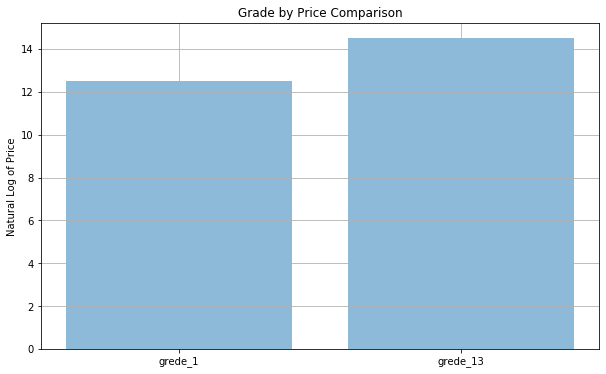

In [41]:
grede_1 = []
grade_11 = X_test["grade_1"]
for i in range(len(y_pred)):
    if y_pred[i] != max(y_pred):
        grede_1.append(np.array(grade_11)[i])

x = ["grede_1","grede_13"]
y = [12.5,14.5]
plt.figure(figsize=(10,6))
plt.bar(x, y, alpha=0.5)
plt.ylabel('Natural Log of Price')
plt.title('Grade by Price Comparison')
plt.grid()
plt.show()

In [42]:
cor2 = grade.corr(price)
print(cor2)

0.6679507713876449


There are 11 grades in the dataset. Grade 13 being the highest or best grade.

The model reports back a coefficient of 0.6679 for grade_13. After transforming, it is roughly 86.89%. Meaning that houses rated at grade 13, generally cost 89.89% more than houses graded 1. Houses with higher grade mean better building quality which cost more to build.

The plot above show the difference in home prices between a grade_1 house and a grade_13 house.

Recommendations:
Instead of putting the money into home renovation to boost house values, once can choose the alternate route by allocating funds in maintaining the home, such as replacing drafty windows, caulking the tiles, or a new paint job for the home.

#### Floor Coefficient

In [43]:
sqft_living_list_1 = []
sqft_living_list_3 = []
for i in range(len(floors)):
    if floors[i] == 1:
        sqft_living_list_1.append(sqft_living[i])
    if floors[i] == 3:
        sqft_living_list_3.append(sqft_living[i]) 

In [44]:
sqft_living_list_floor1 = []
price_list = []
sum_list = []
num_list = []
for i in range(13):
    sqft_living_list_floor1.append(0)
    price_list.append(0)
    sum_list.append(0)
    num_list.append(0)

for j in range(len(sqft_living_list_1)):
    if sqft_living_list_1[j] <= 800:
        sum_list[0] = sum_list[1] + price[j]
        num_list[0] = num_list[1] + 1
    for k in range(11):
        if (sqft_living_list_1[j] > 800 + k*200) & (sqft_living_list_1[j] <= 1000 + k*200):
            sum_list[k+1] = sum_list[k+1] + price[j]
            num_list[k+1] = num_list[k+1] + 1
    if sqft_living_list_1[j] > 3200:
        sum_list[12] = sum_list[12] + price[j]
        num_list[12] = num_list[12] + 1
for i in range(13):
    sqft_living_list_floor1[i] = sum_list[i] / num_list[i]

In [45]:
sqft_living_list_floor3 = []
price_list = []
sum_list = []
num_list = []
for i in range(13):
    sqft_living_list_floor3.append(0)
    price_list.append(0)
    sum_list.append(0)
    num_list.append(0)

for j in range(len(sqft_living_list_3)):
    if sqft_living_list_3[j] <= 800:
        sum_list[0] = sum_list[1] + price[j]
        num_list[0] = num_list[1] + 1
    for k in range(11):
        if (sqft_living_list_3[j] > 800 + k*200) & (sqft_living_list_3[j] <= 1000 + k*200):
            sum_list[k+1] = sum_list[k+1] + price[j]
            num_list[k+1] = num_list[k+1] + 1
    if sqft_living_list_3[j] > 3200:
        sum_list[12] = sum_list[12] + price[j]
        num_list[12] = num_list[12] + 1
for i in range(13):
    sqft_living_list_floor3[i] = sum_list[i] / num_list[i]

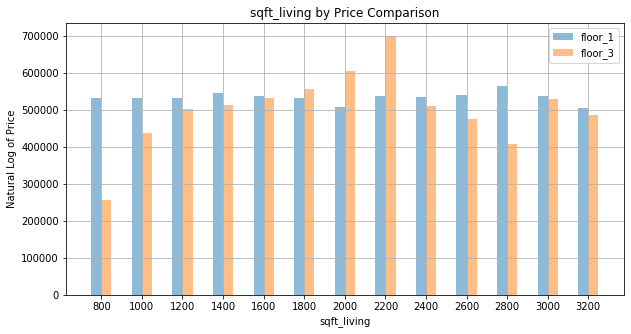

In [46]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13]
x = np.array(x)
x_label = []
for i in range(13):
    aa = 800+i*200
    x_label.append(str(aa))

bar_width = 0.25
plt.figure(figsize=(10,5))
plt.bar(x, sqft_living_list_floor1, bar_width, alpha=0.5, label='floor_1')
plt.bar(x + bar_width, sqft_living_list_floor3, bar_width, alpha=0.5, label='floor_3')
plt.ylabel('Natural Log of Price')
plt.xlabel('sqft_living')
plt.title('sqft_living by Price Comparison')
plt.grid()
# plt.xticks(rotation=30)
plt.xticks(x+bar_width/2, x_label)
plt.legend()
plt.show()

It can be seen from the above figure that when the number of floors is 1, the change of housing price with the housing area is not very obvious. When the number of floors is 3, the house price has an obvious change trend with the change of housing area. The combination of the number of floors and the area of houses is not necessarily the case. The more floors, the higher the house price. This may be due to other factors Set the price of the house, such as rating, location, etc.

### Conclusion

First of all, we analyze the columns (features) in the dataset, and select the appropriate features. At the same time, the discrete features are separately hot coded.

Then we forecast house prices. We adopt multiple linear regression model. Before that, we divided the data set into training set and test set.

Finally, a series of analysis is carried out according to the prediction results. The prediction results of the model are satisfactory and there is no fitting phenomenon. According to the prediction results, the housing area has a great impact on the housing price, and the number of floors will also have an impact. For people who like a large area, it may not be directly proportional to the price, which will cause a certain waste of resources.